# 1. Import Library

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files

# 2. Write Function

### 2.1 Normalization

In [0]:
def minmaxNorm(Data, _min, _max):
    Data_Norm = (Data - _min)/(_max - _min)
    return Data_Norm

In [0]:
def min4norm(Data):
    _min = Data.min(axis=0, keepdims = True)
    return _min

In [0]:
def max4norm(Data):
    _max = Data.max(axis=0, keepdims = True)
    return _max

### 2.2 วัดระยะห่างระหว่างข้อมูลแต่ละตัวใน Validation Set กับข้อมูลทุกตัวใน Training Set

In [0]:
def KNN_find_distance_each_data(X_Train, X_Valid):
    all_distance = []
    for x_valid in X_Valid:
        distance = KNN_find_distance(X_Train, x_valid)
        all_distance.append(distance)
    return all_distance

In [0]:
def KNN_find_distance(X_Train, x_valid):
    distance2 = ((X_Train - x_valid)**2).sum(axis=1)
    distance = np.sqrt(distance2)
    return distance

### 2.3 เรียงลำดับ Target ตามระยะห่าง

In [0]:
def KNN_find_sorted_target_each_data(Y_Train, all_distance):
    all_sorted_target = []
    for distance in all_distance:
        sorted_target = KNN_sort_target_by_distance(Y_Train, distance)
        all_sorted_target.append(sorted_target)
    return all_sorted_target

In [0]:
def KNN_sort_target_by_distance(Y_Train, distance):
    sorted_target = Y_Train[distance.argsort()]
    return sorted_target

### 2.4 หาผลลัพธ์จากเพื่อนบ้านที่ใกล้ที่สุด K ตัว

#### 2.4.1 KNN-C

In [0]:
def KNNC_find_class_each_data(all_sorted_target, K):
    all_class = []
    for sorted_target in all_sorted_target:
        _class = KNNC_find_class(sorted_target, K)
        all_class.append(_class)
    all_class = np.array(all_class).reshape(-1, 1)
    return all_class

In [0]:
def KNNC_find_class(sorted_target, K):
    unique, count_unique = np.unique(sorted_target[:K, :], return_counts = True)
    _class = unique[count_unique.argmax()]
    return _class

#### 2.4.2 KNN-R

In [0]:
def KNNR_find_value_each_data(all_sorted_target, K):
    all_value = []
    for sorted_target in all_sorted_target:
        value = KNNR_find_value(sorted_target, K)
        all_value.append(value)
    all_value = np.array(all_value).reshape(-1, 1)
    return all_value

In [0]:
def KNNR_find_value(sorted_target, K):
    value = sorted_target[:K, :].mean()
    return value

### 2.5 หา error ของ K แต่ละค่า และ หา K ที่ทำให้ error บน Validation Set ต่ำที่สุด

#### 2.5.1 KNN-C

In [0]:
def KNNC_find_error_each_K(Y_Valid, all_sorted_target, min_K, max_K):
    K_list = [K for K in range(min_K, max_K + 1)]
    error_list = []
    for K in K_list:
        K_all_class = KNNC_find_class_each_data(all_sorted_target, K)
        K_error = find_error_classification(Y_Valid, K_all_class)
        error_list.append(K_error)
    return K_list, error_list

In [0]:
def find_error_classification(Y, Yhat):
    N = Y.shape[0]
    error = (100/N)*(Y != Yhat).sum()
    return error

#### 2.5.2 KNN-R

In [0]:
def KNNR_find_error_each_K(Y_Valid, all_sorted_target, min_K, max_K):
    K_list = [K for K in range(min_K, max_K + 1)]
    error_list = []
    for K in K_list:
        K_all_value = KNNR_find_value_each_data(all_sorted_target, K)
        K_error = find_MAE(Y_Valid, K_all_value)
        error_list.append(K_error)
    return K_list, error_list

In [0]:
def find_MAE(Y, Yhat):
    N = Y.shape[0]
    MAE = (np.abs(Y - Yhat)).sum()/N
    return MAE

In [0]:
def KNN_find_best_K(K_list, error_list):
    K_list = np.array(K_list)
    error_list = np.array(error_list)
    plt.plot(K_list, error_list)
    plt.xlabel('K')
    plt.ylabel('Error')
    sorted_K = K_list[error_list.argsort()]
    error_list.sort()
    best_K = sorted_K[0]
    print(best_K)
    print()
    L = len(K_list)
    for l in range(L):
        print('K :', sorted_K[l], ', error :', error_list[l])
    return best_K

### 2.6 เรียนรู้

#### 2.6.1 KNN-C

In [0]:
def KNNC_fit(X_Train, Y_Train, X_Valid, Y_Valid, min_K, max_K):
    _min = min4norm(X_Train)
    _max = max4norm(X_Train)
    X_Train_Norm = minmaxNorm(X_Train, _min, _max)
    X_Valid_Norm = minmaxNorm(X_Valid, _min, _max)
    all_distance = KNN_find_distance_each_data(X_Train_Norm, X_Valid_Norm)
    all_sorted_target = KNN_find_sorted_target_each_data(Y_Train, all_distance)
    K_list, error_list = KNNC_find_error_each_K(Y_Valid, all_sorted_target, min_K, max_K)
    best_K = KNN_find_best_K(K_list, error_list)
    return best_K

#### 2.6.2 KNN-R

In [0]:
def KNNR_fit(X_Train, Y_Train, X_Valid, Y_Valid, min_K, max_K):
    _min = min4norm(X_Train)
    _max = max4norm(X_Train)
    X_Train_Norm = minmaxNorm(X_Train, _min, _max)
    X_Valid_Norm = minmaxNorm(X_Valid, _min, _max)
    all_distance = KNN_find_distance_each_data(X_Train_Norm, X_Valid_Norm)
    all_sorted_target = KNN_find_sorted_target_each_data(Y_Train, all_distance)
    K_list, error_list = KNNR_find_error_each_K(Y_Valid, all_sorted_target, min_K, max_K)
    best_K = KNN_find_best_K(K_list, error_list)
    return best_K

### 2.7 พยากรณ์

#### 2.7.1 KNN-C

In [0]:
def KNNC_predict(X_Train, Y_Train, X_Test, best_K):
    _min = min4norm(X_Train)
    _max = max4norm(X_Train)
    X_Train_Norm = minmaxNorm(X_Train, _min, _max)
    X_Test_Norm = minmaxNorm(X_Test, _min, _max)
    all_distance = KNN_find_distance_each_data(X_Train, X_Test)
    all_sorted_target = KNN_find_sorted_target_each_data(Y_Train, all_distance)
    Yhat_Test = KNNC_find_class_each_data(all_sorted_target, best_K)
    return Yhat_Test

#### 2.7.2 KNN-R

In [0]:
def KNNR_predict(X_Train, Y_Train, X_Test, best_K):
    _min = min4norm(X_Train)
    _max = max4norm(X_Train)
    X_Train_Norm = minmaxNorm(X_Train, _min, _max)
    X_Test_Norm = minmaxNorm(X_Test, _min, _max)
    all_distance = KNN_find_distance_each_data(X_Train, X_Test)
    all_sorted_target = KNN_find_sorted_target_each_data(Y_Train, all_distance)
    Yhat_Test = KNNR_find_value_each_data(all_sorted_target, best_K)
    return Yhat_Test

# 3. Read Data & Prepare Data

In [22]:
files.upload()

Saving BMI_Dataset_Classification.xlsx to BMI_Dataset_Classification (2).xlsx


{'BMI_Dataset_Classification.xlsx': b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\x00a]I:O\x01\x00\x00\x8f\x04\x00\x00\x13\x00\x00\x00[Content_Types].xml\xad\x94\xcbn\xc20\x10E\xf7\xfd\x8a\xc8\xdb*1tQU\x15\x81E\x1f\xcb\x16\xa9\xf4\x03\\{B,\x1c\xdb\xf2\x0c\x14\xfe\xbe\x93\xf0P[Q\xa0\x82M\xacd\xee\xdcs\xc7\x8e<\x18-\x1b\x97- \xa1\r\xbe\x14\xfd\xa2\'2\xf0:\x18\xeb\xa7\xa5x\x9f<\xe7w"CR\xde(\x17<\x94b\x05(F\xc3\xab\xc1d\x15\x013n\xf6X\x8a\x9a(\xdeK\x89\xba\x86Fa\x11"x\xaeT!5\x8a\xf85MeTz\xa6\xa6 oz\xbd[\xa9\x83\'\xf0\x94S\xeb!\x86\x83G\xa8\xd4\xdcQ\xf6\xb4\xe4\xcf\xeb \t\x1c\x8a\xeca-lY\xa5P1:\xab\x15q].\xbc\xf9E\xc97\x84\x82;;\r\xd66\xe25\x0b\x84\xdcKh+\x7f\x036}\xaf\xbc3\xc9\x1a\xc8\xc6*\xd1\x8bjX%M\xd0\xe3\x14"J\xd6\x17\x87]\xf6\xc4\x0cUe5\xb0\xc7\xbc\xe1\x96\x02\xda@\x06L\x1e\xd9\x12\x12Y\xd8e>\xc8\xd6!\xc1\xff\xe1\xdb=j\xbbO$.\x9dDZ9\xc0\xb3G\xc5\x98@\x19\xac\x01\xa8q\xc5\xda\xf4\x08\x99\xf8\x7f\x82\xf5\xb3\x7f6\xbf\xb39\x02\xfc\x0ci\xf6\x11\xc2\xec\xd2\xc3\xb6k\xd1(\xebO\xe0wb\x94\xd

In [0]:
Data = pd.read_excel('BMI_Dataset_Classification.xlsx', usecols = 'A:C')

In [24]:
Data

,Weight,Height,Target
0,66.17,185.21,normal
1,71.27,168.91,fat lv3
2,73.17,179.83,normal
3,81.74,171.76,fat lv2
4,92.97,172.89,fat lv3
...,...,...,...
995,63.24,141.45,fat lv3
996,47.55,166.64,thin
997,68.10,168.52,fat lv1
998,74.39,169.24,fat lv2


In [0]:
DataMatrix = Data.values

In [26]:
DataMatrix.shape

(1000, 3)

In [0]:
D = DataMatrix.shape[1] - 1

In [0]:
X = DataMatrix[:, :D]
X = np.array(X, dtype=np.float32)

In [0]:
Y = DataMatrix[:, D:]

In [0]:
start_train = 0
end_train = -300
end_valid = -150
# end_test = -1

In [0]:
X_Train = X[start_train:end_train, :]
Y_Train = Y[start_train:end_train, :]

X_Valid = X[end_train:end_valid, :]
Y_Valid = Y[end_train:end_valid, :]

X_Test = X[end_valid:, :]
Y_Test = Y[end_valid:, :]

# 4. Create Model

7

K : 7 , error : 5.333333333333333
K : 1 , error : 6.0
K : 3 , error : 6.666666666666666
K : 2 , error : 7.333333333333333
K : 4 , error : 7.333333333333333
K : 6 , error : 7.333333333333333
K : 9 , error : 7.333333333333333
K : 11 , error : 8.0
K : 10 , error : 8.0
K : 15 , error : 8.0
K : 5 , error : 8.0
K : 8 , error : 8.0
K : 13 , error : 8.666666666666666
K : 14 , error : 8.666666666666666
K : 16 , error : 8.666666666666666
K : 12 , error : 9.333333333333332
K : 21 , error : 9.333333333333332
K : 25 , error : 10.0
K : 24 , error : 10.0
K : 22 , error : 10.0
K : 20 , error : 10.0
K : 17 , error : 10.0
K : 19 , error : 10.0
K : 18 , error : 10.666666666666666
K : 23 , error : 10.666666666666666
K : 27 , error : 10.666666666666666
K : 29 , error : 11.333333333333332
K : 26 , error : 11.333333333333332
K : 30 , error : 12.0
K : 28 , error : 12.666666666666666


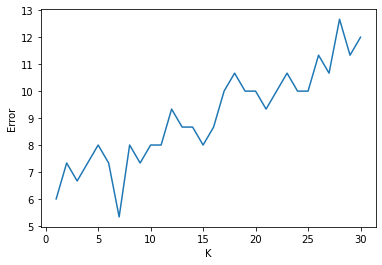

In [32]:
best_K = KNNC_fit(X_Train, Y_Train, X_Valid, Y_Valid, 1, 30)

# 5. Make Prediction

In [0]:
Yhat_Test = KNNC_predict(X_Train, Y_Train, X_Test, best_K)

In [0]:
error_Test = find_error_classification(Y_Test, Yhat_Test)

In [35]:
error_Test

9.333333333333332

In [36]:
np.hstack([Yhat_Test, Y_Test])

array([['fat lv2', 'fat lv2'],
       ['fat lv2', 'fat lv2'],
       ['fat lv3', 'fat lv3'],
       ['fat lv2', 'fat lv2'],
       ['fat lv2', 'fat lv2'],
       ['normal', 'normal'],
       ['normal', 'normal'],
       ['fat lv1', 'fat lv3'],
       ['fat lv1', 'fat lv1'],
       ['fat lv1', 'fat lv1'],
       ['normal', 'normal'],
       ['normal', 'normal'],
       ['normal', 'normal'],
       ['fat lv2', 'fat lv2'],
       ['normal', 'normal'],
       ['fat lv3', 'fat lv3'],
       ['fat lv1', 'fat lv1'],
       ['normal', 'normal'],
       ['fat lv3', 'fat lv3'],
       ['normal', 'normal'],
       ['fat lv1', 'fat lv1'],
       ['fat lv2', 'fat lv2'],
       ['fat lv1', 'fat lv1'],
       ['normal', 'normal'],
       ['fat lv1', 'fat lv1'],
       ['fat lv1', 'fat lv1'],
       ['fat lv1', 'fat lv1'],
       ['normal', 'normal'],
       ['fat lv2', 'fat lv2'],
       ['normal', 'normal'],
       ['normal', 'normal'],
       ['fat lv1', 'fat lv1'],
       ['fat lv2', 'fat lv2'],
 

1

K : 1 , error : 8.666666666666666
K : 4 , error : 9.333333333333332
K : 5 , error : 9.333333333333332
K : 3 , error : 10.0
K : 6 , error : 10.0
K : 7 , error : 10.0
K : 8 , error : 10.0
K : 9 , error : 10.0
K : 10 , error : 10.0
K : 11 , error : 10.666666666666666
K : 13 , error : 10.666666666666666
K : 2 , error : 11.333333333333332
K : 12 , error : 11.333333333333332
K : 20 , error : 11.333333333333332
K : 17 , error : 12.0
K : 15 , error : 12.0
K : 14 , error : 12.0
K : 21 , error : 12.666666666666666
K : 24 , error : 12.666666666666666
K : 25 , error : 12.666666666666666
K : 16 , error : 12.666666666666666
K : 19 , error : 13.333333333333332
K : 22 , error : 13.333333333333332
K : 23 , error : 13.333333333333332
K : 18 , error : 14.0
K : 26 , error : 14.666666666666666
K : 27 , error : 14.666666666666666
K : 29 , error : 15.333333333333332
K : 28 , error : 16.0
K : 30 , error : 16.666666666666664


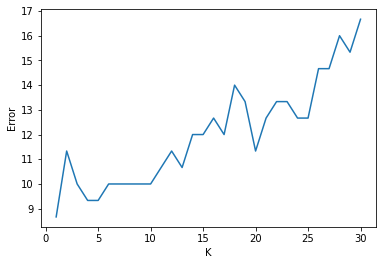

In [37]:
best_K = KNNC_fit(X_Train, Y_Train, X_Test, Y_Test, 1, 30)

#6. Input Prediction

In [38]:
Weight = float(input('กรุณากรอกน้ำหนักตัว (กก): '))
Height = float(input('กรุณากรอกส่วนสูง (ซม): '))
PersonalData = np.array([Weight, Height]).reshape(1, -1)
PredictionBMI = KNNC_predict(X_Train, Y_Train, PersonalData, best_K)
print(f'เมื่อวัดจาก BMI คุณมีสถานะ {PredictionBMI[0][0]}.')

กรุณากรอกน้ำหนักตัว (กก): 63
กรุณากรอกส่วนสูง (ซม): 170
เมื่อวัดจาก BMI คุณมีสถานะ normal.
